In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import numpy as np

%matplotlib inline
#%matplotlib tk
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
import sys
sys.path.append("../../")

%load_ext autoreload
%autoreload 2

from src.Structure import AtomCls
#from src.Atomic import Collision, SEsolver

from src.Util import Class

from src.Visual import Grotrian

import src.Constants as Cst
#from src.Atomic import LTELib

#from src.Function.StatisticalEquilibrium import LibClass as SELib

from src.Atomic import Hydrogen

---

In [4]:
atom, paths = AtomCls.InitAtom("../../data/conf/H.conf", isHydrogen=True)

---

---

## Einstein `Aji` coeficient

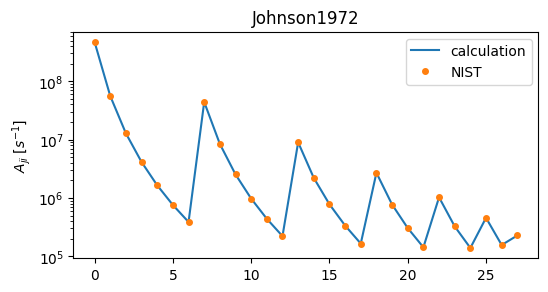

In [5]:
ni_arr = atom.Line.idxI[:] + 1
nj_arr = atom.Line.idxJ[:] + 1
Aji = Hydrogen.Einstein_A_coefficient(ni_arr, nj_arr)

fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=100)
ax.plot( Aji[:], label="calculation")
ax.plot( atom.Line.AJI[:], 'o', markersize=4, label="NIST" )

ax.legend(loc="best")
ax.set_yscale("log")
ax.set_title("Johnson1972")
ax.set_ylabel("$A_{ji} \; [s^{-1}]$")
plt.show()

## Collisional Excitation rate coefficient

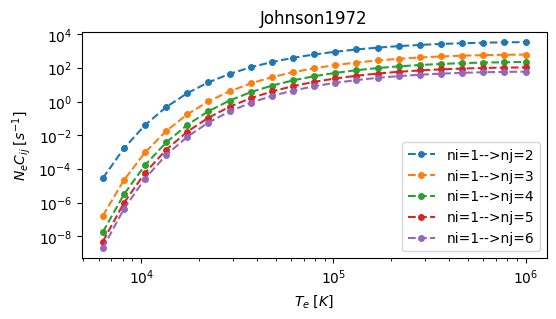

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=100)

n = 21
Te = np.logspace(3.8, 6, n)
Ne = 1E11

k = 6
ni = 1
for nj in range(ni+1, k+1):
    Cij = Hydrogen.CE_rate_coe(ni,nj,Te)
    ax.plot( Te, Ne*Cij, '--o', markersize=4, label=f"ni={ni}-->nj={nj}" )

ax.legend(loc="best")
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("$T_{e} \; [K]$")

ax.set_title("Johnson1972")
ax.set_ylabel("$N_{e}C_{ij} \; [s^{-1}]$")
plt.show()

## Collisional ionization rate coefficient

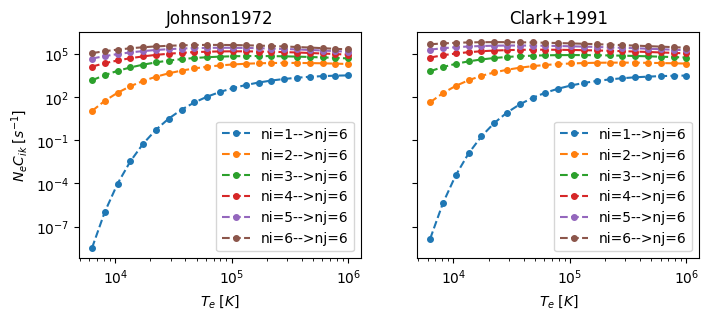

In [7]:
fig, axs = plt.subplots(1,2, figsize=(8,3), dpi=100, sharey=True)

n = 21
Te = np.logspace(3.8, 6, n)
Ne = 1E11

k = 6

functions = {
    "Johnson1972" : Hydrogen.CI_rate_coe,
    "Clark+1991"  : Hydrogen.CI_rate_coe_Clark,
}

for i, name in enumerate(functions.keys()):
    ax = axs[i]
    for ni in range(1, k+1):
        Cik = functions[name](ni,Te)
        ax.plot( Te, Ne*Cik, '--o', markersize=4, label=f"ni={ni}-->nj={nj}" )
        ax.legend(loc="best")
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_title(name)
        ax.set_ylabel( "$N_{e}C_{ik} \; [s^{-1}]$" ) if i==0 else None
        ax.set_xlabel( "$T_{e} \; [K]$" )

plt.show()

**let's use *Johnson1972* version**

## bound-free Gaunt factor

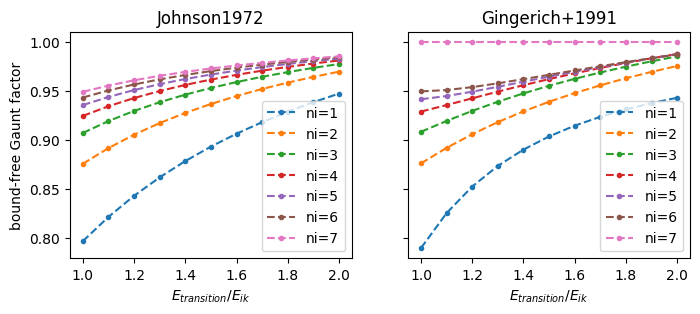

In [8]:
x = np.linspace(1, 2, 11)

fig, axs = plt.subplots(1,2, figsize=(8,3), dpi=100, sharey=True)

functions = {
    "Johnson1972" : Hydrogen.Gaunt_factor,
    "Gingerich+1991"  : Hydrogen.Gaunt_factor_Gingerich,
}

for i, name in enumerate(functions.keys()):
    ax = axs[i]
    for ni in range(1,8):
        g = functions[name](ni, x)
        ax.plot( x, g, '--o', markersize=3, label=f"ni={ni}" )
        ax.legend(loc='best')
        ax.set_title(name)
        ax.set_xlabel("$E_{transition}/E_{ik}$")
        ax.set_ylabel("bound-free Gaunt factor") if i==0 else None


plt.show()

**let's use *Johnson1972* version**

## photoionization cross section

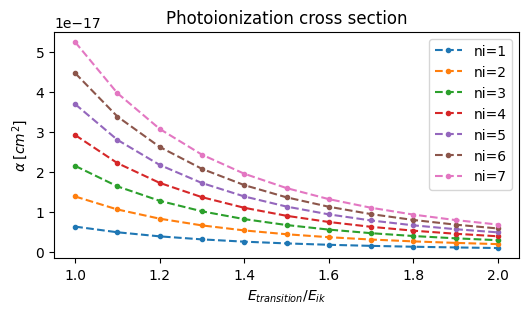

In [9]:
x = np.linspace(1, 2, 11)

fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=100)

functions = {
    "Photoionization cross section" : Hydrogen.PI_cross_section,
}

for i, name in enumerate(functions.keys()):
    for ni in range(1,8):
        alpha = functions[name](ni, x, 1)
        ax.plot( x, alpha, '--o', markersize=3, label=f"ni={ni}" )
        ax.legend(loc='best')
        ax.set_title(name)
        ax.set_ylabel("$\\alpha \; [cm^{2}]$")
        ax.set_xlabel("$E_{transition}/E_{ik}$")


plt.show()

## Spontaneous radiative recombination

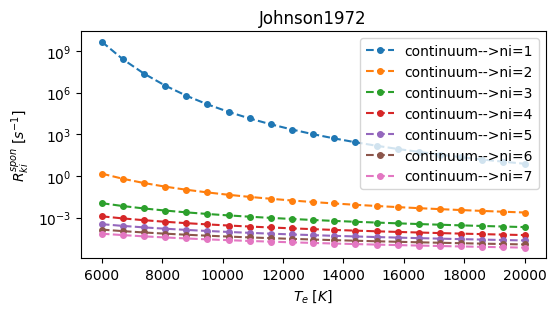

In [14]:
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=100)

n = 21
#Te = np.logspace(3.8, 6, n)
Te = np.linspace(6000, 2E4, n)
Ne = 1E10



for ni in range(1, 8):
    RCki = Hydrogen.Rki_spon_rate_coe(ni,Te)
    ax.plot( Te, Ne*RCki, '--o', markersize=4, label=f"continuum-->ni={ni}" )

ax.legend(loc="best")
#ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("$T_{e} \; [K]$")

ax.set_title("Johnson1972")
ax.set_ylabel("$R_{ki}^{spon} \; [s^{-1}]$")
plt.show()

value so small?